In [71]:
import pandas as pd
import numpy as np
import altair as alt

In [72]:
PATH = "tests/data/gamesResult.csv"

In [73]:
df = pd.read_csv(PATH)

In [74]:
df.shape

(7561, 70)

In [75]:
df = df[df["target"] >= 4]

In [76]:
df

user_rating_count  is_with_subtitle  is_iap  log_size  \
1                 217.0              True    True  3.794809   
2               14689.0             False    True  4.532578   
3                1054.0             False    True  5.081113   
4                  10.0              True    True  4.770395   
5                 162.0             False    True  3.795928   
...                 ...               ...     ...       ...   
7547              129.0             False   False  5.155885   
7548                8.0             False   False  4.183168   
7552            10640.0              True    True  5.148433   
7555               11.0              True    True  3.626214   
7557              991.0             False    True  5.704924   

      cur_release_duration  min_iap  mediumn_iap  max_iap  n_iap  nlan  ...  \
1                       17     0.99         1.99     9.99    7.0     1  ...   
2                       14     0.99         7.99    94.99   10.0     1  ...   
3                       73     3.99        11.99    23.99   10.0     1  ...   
4                       69     1.99         1.99     1.99    1.0     1  ...   
5                       61     0.99         1.99     3.99    3.0     5  ...   
...                    ...      ...          ...      ...    ...   ...  ...   
7547                    10     0.00         0.00     0.00    0.0    12  ...   
7548                    11     0.00         0.00     0.00    0.0     1  ...   
7552                     6     1.99         2.49     2.99    2.0     1  ...   
7555                    20     0.99         2.99     8.99    4.0    31  ...   
7557                    20     0.99        15.99    79.99   10.0    18  ...   

      age_rating_17+  age_rating_4+  age_rating_9+  price_zone_(-0.001, 0.01]  \
1                  0              1              0                          1   
2                  0              0              1                          1   
3                  0              1              0                          1   
4                  0              1              0                          1   
5                  0              1              0                          1   
...              ...            ...            ...                        ...   
7547               0              1              0                          0   
7548               0              1              0                          1   
7552               0              0              0                          1   
7555               0              1              0                          1   
7557               0              1              0                          1   

      price_zone_(0.01, 4.99]  price_zone_(4.99, 9.99]  \
1                           0                        0   
2                           0                        0   
3                           0                        0   
4                           0                        0   
5                           0                        0   
...                       ...                      ...   
7547                        1                        0   
7548                        0                        0   
7552                        0                        0   
7555                        0                        0   
7557                        0                        0   

      price_zone_(9.99, 19.99]  price_zone_(19.99, 59.99]  \
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   
5                            0                          0   
...                        ...                        ...   
7547                         0                          0   
7548                         0                          0   
7552                         0                          0   
7555                

In [77]:
np.unique(df.dtypes.values)

array([dtype('bool'), dtype('int64'), dtype('float64')], dtype=object)

In [78]:

corr = df.corr()["target"].sort_values().reset_index()

In [79]:
corr

index    target
0       original_dt_year -0.233934
1    cur_version_dt_year -0.146699
2   cur_release_duration -0.130357
3       is_with_subtitle -0.093427
4    genre_Entertainment -0.068223
..                   ...       ...
65          genre_Casual  0.076282
66          genre_Puzzle  0.097516
67                target  1.000000
68   genre_Kids & Family       NaN
69         genre_Weather       NaN

[70 rows x 2 columns]

In [80]:
alt.Chart(corr).mark_bar().encode(
    alt.X("target"),
    alt.Y("index")
)

alt.Chart(...)

In [81]:
df["original_dt_year"].head()

1    5
2    2
3    7
4    8
5    6
Name: original_dt_year, dtype: int64

In [82]:
pd.isnull(df).sum(0).sort_values()

user_rating_count      0
genre_Photo & Video    0
genre_Productivity     0
genre_Puzzle           0
genre_Racing           0
                      ..
genre_Casual           0
genre_Casino           0
genre_Card             0
genre_Family           0
target                 0
Length: 70, dtype: int64

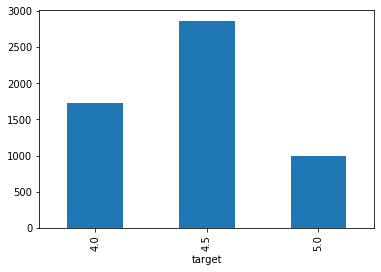

In [83]:
df.groupby("target")["target"].count().plot(kind="bar")

In [87]:
alt.Chart(df.groupby("target").mean().stack().reset_index().rename({0:"value"},axis=1)).mark_bar().encode(
    alt.X("target:O"),
    alt.Y("value:Q"),
    color="target:O"
).facet(
    column="level_1"
).resolve_scale(
    y='independent'
)

alt.FacetChart(...)

In [85]:

alt.Chart(df.sample(4000).assign(user_rating_count=df["user_rating_count"].apply(lambda x:np.log10(x)))).mark_bar().encode(
    alt.Y("count()"),
    alt.X("user_rating_count:Q", bin=True)
).facet(column="target:Q").resolve_scale(
    y='independent'
)

alt.FacetChart(...)